# Flight Price Prediction Project

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Examining The Data

In [71]:
df = pd.read_excel('Test_set.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


This method print the information about the DataFrame including the index type and column type,non-null values and memory usage.

In [73]:
df.shape

(2671, 10)

Dataset contains 2671 rows and 10 columns

In [74]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [75]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

Target/dependent variables is discrete and categorial in nature

In [76]:
df.loc[df['Additional_Info']==" "]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info


In [77]:
df["Additional_Info"]=df["Additional_Info"].replace(" ",np.nan)

In [78]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [79]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

# Making DataFrame for the Nominal Data

In [80]:
df_visualization_nominal=df[["Airline","Date_of_Journey","Source","Destination","Route","Dep_Time","Arrival_Time","Duration","Total_Stops"]].copy()

In [81]:
df_visualization_nominal.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops'],
      dtype='object')

Dataset contains visualization of nominal 9 columns

# Visualization of the Data

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64


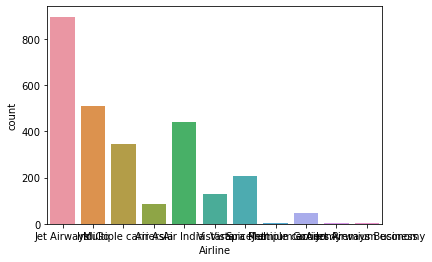

In [82]:
ax = sns.countplot(x="Airline",data=df_visualization_nominal)
print(df_visualization_nominal["Airline"].value_counts())

Here countplot contains the data visualization of nominal columns of Airline

9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
1/04/2019      78
24/03/2019     78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/05/2019     65
27/03/2019     65
1/05/2019      62
3/03/2019      62
9/03/2019      55
12/03/2019     43
18/03/2019     41
01/03/2019     34
15/03/2019     33
06/03/2019     28
3/04/2019      28
3/05/2019      27
03/03/2019     26
9/04/2019      24
21/06/2019     24
15/04/2019     23
18/06/2019     22
21/04/2019     22
09/03/2019     21
24/04/2019     21
27/04/2019     15
6/04/2019      14
18/04/2019     12
1/03/2019      12
12/04/2019     11
Name: Date_of_Journey, dtype: int64


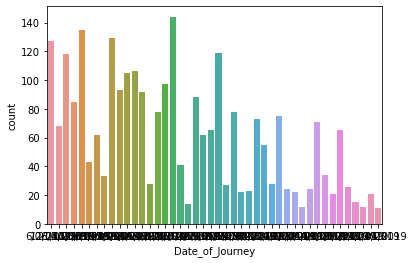

In [83]:
ax = sns.countplot(x="Date_of_Journey",data=df_visualization_nominal)
print(df_visualization_nominal["Date_of_Journey"].value_counts())

Here countplot contains the data visualization of nominal columns of Data_Of_Journey

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


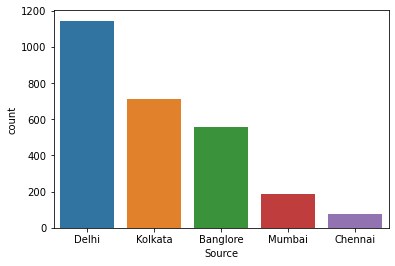

In [84]:
ax = sns.countplot(x="Source",data=df_visualization_nominal)
print(df_visualization_nominal["Source"].value_counts())

Here countplot contains the data visualization of nominal columns of Source

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


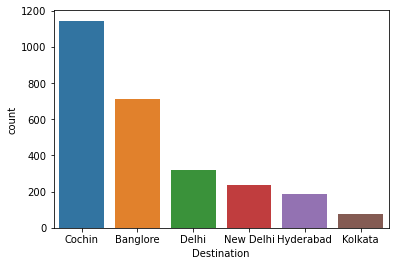

In [85]:
ax = sns.countplot(x="Destination",data=df_visualization_nominal)
print(df_visualization_nominal["Destination"].value_counts())

Here countplot contains the data visualization of nominal columns of Destination

DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
BLR → BOM → IDR → GWL → DEL      1
BLR → GOI → DEL                  1
CCU → PAT → BLR                  1
BLR → VGA → DEL                  1
BOM → GOI → PNQ → HYD            1
Name: Route, Length: 100, dtype: int64


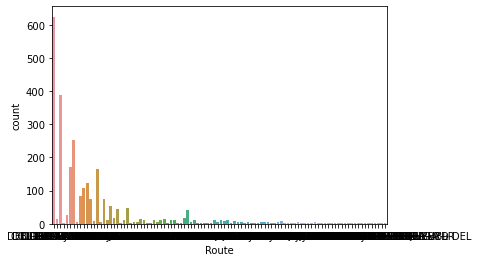

In [86]:
ax = sns.countplot(x="Route",data=df_visualization_nominal)
print(df_visualization_nominal["Route"].value_counts())

Here countplot contains the data visualization of nominal columns of Route

10:00    62
18:55    55
20:00    53
14:05    51
17:00    48
         ..
22:30     1
16:35     1
15:35     1
06:15     1
23:00     1
Name: Dep_Time, Length: 199, dtype: int64


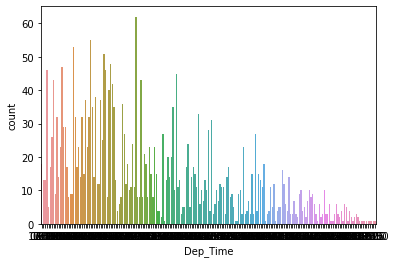

In [87]:
ax = sns.countplot(x="Dep_Time",data=df_visualization_nominal)
print(df_visualization_nominal["Dep_Time"].value_counts())

Here countplot contains the data visualization of nominal columns of Dep_Time

19:00           113
21:00           106
19:15           101
12:35            37
16:10            31
               ... 
19:10 13 May      1
10:00 02 Apr      1
19:10 02 Apr      1
01:20 04 Mar      1
20:25 07 Jun      1
Name: Arrival_Time, Length: 704, dtype: int64


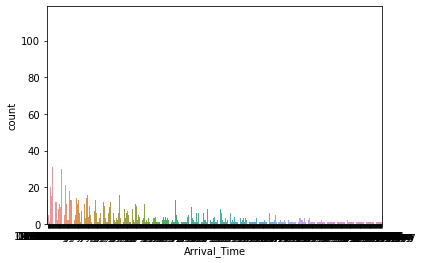

In [88]:
ax = sns.countplot(x="Arrival_Time",data=df_visualization_nominal)
print(df_visualization_nominal["Arrival_Time"].value_counts())

Here countplot contains the data visualization of nominal columns of Arrival_Time

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
30h 45m      1
32h 5m       1
32h 20m      1
28h 55m      1
5m           1
Name: Duration, Length: 320, dtype: int64


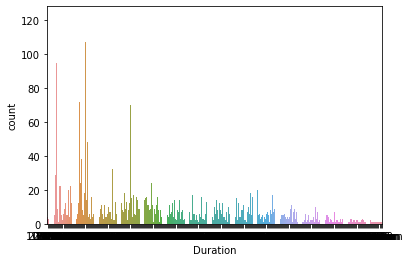

In [89]:
ax = sns.countplot(x="Duration",data=df_visualization_nominal)
print(df_visualization_nominal["Duration"].value_counts())

Here countplot contains the data visualization of nominal columns of Duration

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64


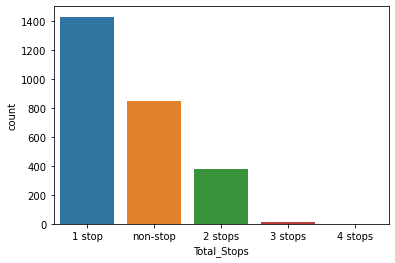

In [90]:
ax = sns.countplot(x="Total_Stops",data=df_visualization_nominal)
print(df_visualization_nominal["Total_Stops"].value_counts())

Here countplot contains the data visualization of nominal columns of Total_Stops

# Making dataframe of the ordinal data

In [91]:
df_visualization_ordinal=df[["Airline","Source"]].copy()

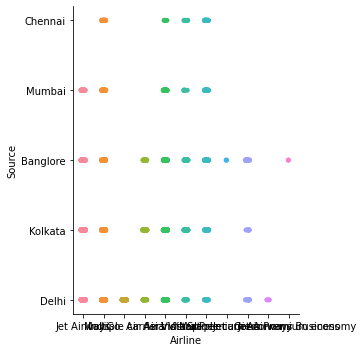

In [92]:
sns.catplot(x="Airline",y="Source",data=df)

Here catplot contains the data visualization of ordinal data of Airline and Source,here x=Airline and y=Source

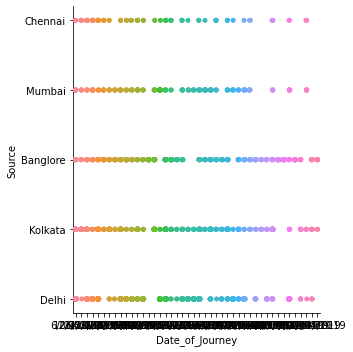

In [93]:
sns.catplot(x="Date_of_Journey",y="Source",data=df)

Here catplot contains the data visualization of ordinal data of Airline and Source,here x=Data_of_journey and y=Source

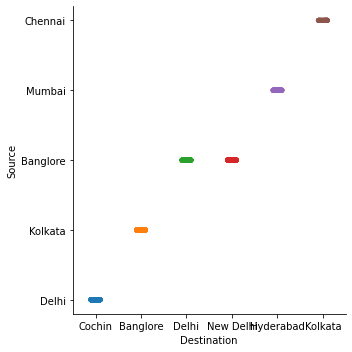

In [94]:
sns.catplot(x="Destination",y="Source",data=df)

Here catplot contains the data visualization of ordinal data of Airline and Source,here x=Destination and y=Source

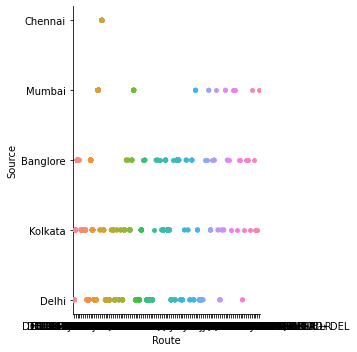

In [95]:
sns.catplot(x="Route",y="Source",data=df)

Here catplot contains the data visualization of ordinal data of Airline and Source,here x=Route and y=Source

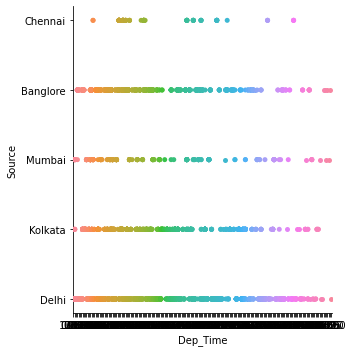

In [96]:
sns.catplot(x="Dep_Time",y="Source",data=df)

Here catplot contains the data visualization of ordinal data of Airline and Source,here x=Dep_Time and y=Source

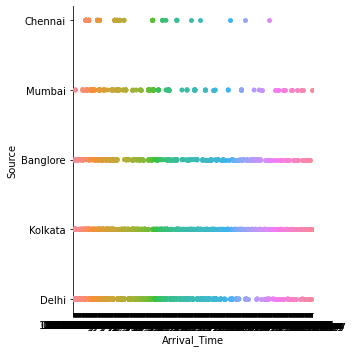

In [97]:
sns.catplot(x="Arrival_Time",y="Source",data=df)

Here catplot contains the data visualization of ordinal data of Airline and Source,here x=Airrival_Time and y=Source

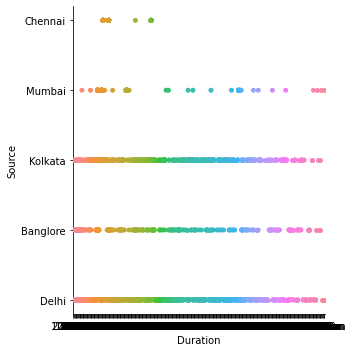

In [98]:
sns.catplot(x="Duration",y="Source",data=df)

Here catplot contains the data visualization of ordinal data of Airline and Source,here x=Duration and y=Source

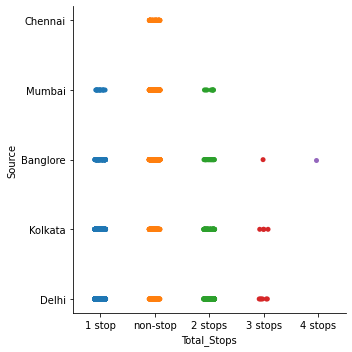

In [99]:
sns.catplot(x="Total_Stops",y="Source",data=df)

Here catplot contains the data visualization of ordinal data of Airline and Source,here x=Total_Stops and y=Source

# checking the distribution of the continuous value of the object type columns

In [100]:
df_visualization_continuous=df[["Total_Stops","Additional_Info","Duration","Arrival_Time","Airline","Source"]].copy()

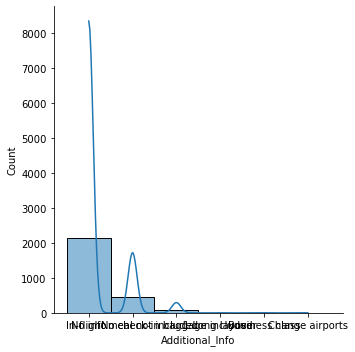

In [101]:
sns.displot(df_visualization_continuous['Additional_Info'], kde=True)

Data is not normally distributed in this columns,because of viscous problem.

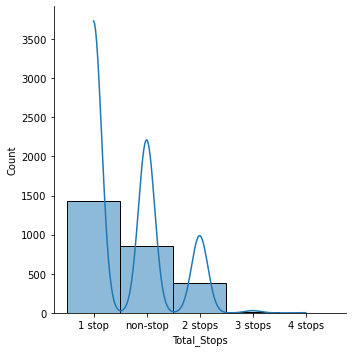

In [102]:
sns.displot(df_visualization_continuous['Total_Stops'], kde=True)

Data is not normally distributed in this columns,because of viscous problem.

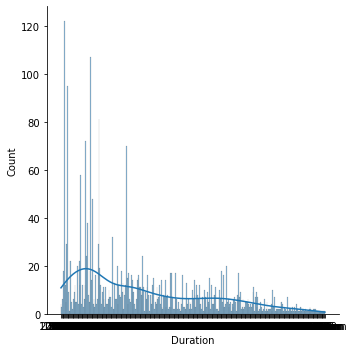

In [103]:
sns.displot(df_visualization_continuous['Duration'], kde=True)

Data is not normally distributed in this columns,because of viscous problem.

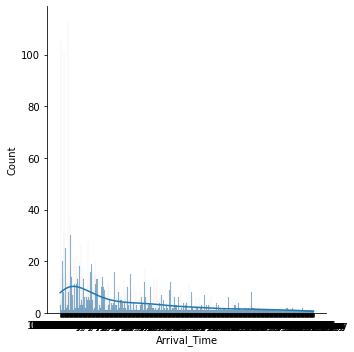

In [104]:
sns.displot(df_visualization_continuous['Arrival_Time'], kde=True)

Data is not normally distributed in this columns,because of viscous problem.

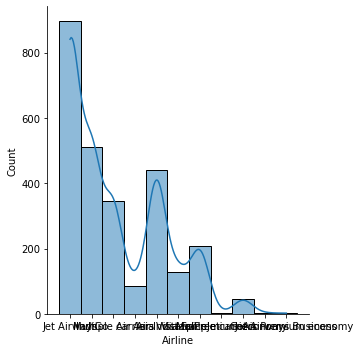

In [105]:
sns.displot(df_visualization_continuous['Airline'], kde=True)

Data is not normally distributed in this columns,because of viscous problem.

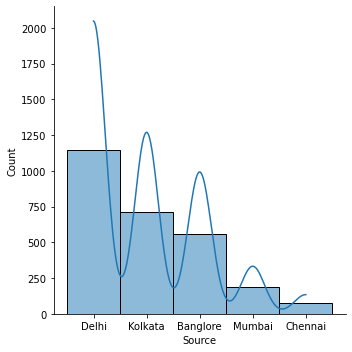

In [106]:
sns.displot(df_visualization_continuous['Source'], kde=True)

Data is not normally distributed in this columns,because of viscous problem.

# Encoding Method

In [107]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Additional_Info']=LE.fit_transform(df['Additional_Info'])

In [108]:
df.Additional_Info.unique()

array([5, 3, 4, 0, 1, 2])

In [109]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,5
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,3
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,5


In [110]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Airline']=LE.fit_transform(df['Airline'])

In [111]:
df.Airline.unique()

array([ 4,  3,  6,  0,  1,  9,  8, 10,  2,  7,  5])

In [112]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,5
1,3,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,5
2,4,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,3
3,6,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,5
4,0,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,5


In [113]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Date_of_Journey']=LE.fit_transform(df['Date_of_Journey'])

In [114]:
df.Date_of_Journey.unique()

array([39, 10, 22, 27, 11,  8,  6, 12, 18, 20, 15, 14, 35,  2, 24, 36, 42,
       16, 37,  7, 32, 28, 43, 34,  5, 19, 13, 38, 40, 33, 31, 23, 21, 17,
       41, 26,  0,  3, 30,  1, 29,  4, 25,  9])

In [115]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,5
1,3,10,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,5
2,4,22,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,3
3,6,22,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,5
4,0,27,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,5


In [116]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Source']=LE.fit_transform(df['Source'])

In [117]:
df.Source.unique()

array([2, 3, 0, 4, 1])

In [118]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,5
1,3,10,3,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,5
2,4,22,2,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,3
3,6,22,2,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,5
4,0,27,0,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,5


In [119]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Destination']=LE.fit_transform(df['Destination'])

In [120]:
df.Destination.unique()

array([1, 0, 2, 5, 3, 4])

In [121]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,1,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,5
1,3,10,3,0,CCU → MAA → BLR,06:20,10:20,4h,1 stop,5
2,4,22,2,1,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,3
3,6,22,2,1,DEL → BOM → COK,08:00,21:00,13h,1 stop,5
4,0,27,0,2,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,5


In [122]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Route']=LE.fit_transform(df['Route'])

In [123]:
df.Route.unique()

array([76, 65, 16, 24, 57, 43, 45, 92, 83,  5, 51, 88, 74, 33, 68, 99, 46,
       75, 84, 93, 60, 50, 78, 62, 91, 58, 77, 56, 15, 10, 40,  0, 30, 80,
       87, 82, 52, 18,  4, 85, 70, 96, 94, 67, 20,  8,  6, 69, 39, 21, 61,
       47, 72, 25, 73, 19,  3, 79, 71, 48, 23, 64, 97, 14, 98, 29, 44, 89,
       95, 81,  7,  2, 36, 55, 11,  1, 37, 54, 90, 63, 66, 35, 13, 27, 49,
       31, 34, 53, 17,  9, 86, 41, 26, 22, 38, 28, 12, 42, 59, 32])

In [124]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,1,76,17:30,04:25 07 Jun,10h 55m,1 stop,5
1,3,10,3,0,65,06:20,10:20,4h,1 stop,5
2,4,22,2,1,76,19:15,19:00 22 May,23h 45m,1 stop,3
3,6,22,2,1,76,08:00,21:00,13h,1 stop,5
4,0,27,0,2,16,23:55,02:45 25 Jun,2h 50m,non-stop,5


In [125]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Dep_Time']=LE.fit_transform(df['Dep_Time'])

In [126]:
df.Dep_Time.unique()

array([138,  31, 156,  48, 198, 146,  44, 116,  70, 127, 101,  36,  58,
        24, 181,  96,  68, 193,  75, 164,  21, 177, 124, 102, 192, 162,
        40,  26, 132, 152,  71, 135,  93, 191, 176, 141,  62, 103,  66,
         5,  84, 133,  27,  39, 130, 160,  10, 179,  82,  88, 183,  25,
        47,  59,  51,  63,  69, 112, 186,  38, 163, 158, 113,  22,  34,
       136, 180,  45,  37, 139,  79, 167, 169,  23, 114, 175, 107, 161,
        52, 184, 178,   6,  53, 172, 105, 109,  78, 159, 117,  29, 188,
        54, 110,  65,   3,  56, 154,  57,  83,  15, 104,  64, 142, 121,
         9,   1, 153, 195,  81,  20,  19,  91,  35, 145,  98,  61,   7,
       197,  46,  87, 168,  50, 137,  67, 122,  74, 108,  33,  86, 155,
       173, 115, 131, 128,  73,  13,  11,  12, 148, 119, 157,  95,  94,
        60, 170,  90,  77,  55,  42, 111,  76,  16, 123, 118, 165, 151,
       125, 196, 129,  41,  97,  28, 174,  80,  30, 144, 150,  92,  18,
       185,  43,  17, 189,  14, 147, 140,   2,  85, 187, 120, 10

In [127]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,1,76,138,04:25 07 Jun,10h 55m,1 stop,5
1,3,10,3,0,65,31,10:20,4h,1 stop,5
2,4,22,2,1,76,156,19:00 22 May,23h 45m,1 stop,3
3,6,22,2,1,76,48,21:00,13h,1 stop,5
4,0,27,0,2,16,198,02:45 25 Jun,2h 50m,non-stop,5


In [128]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Arrival_Time']=LE.fit_transform(df['Arrival_Time'])

In [129]:
df.Arrival_Time.unique()

array([150, 353, 566, 633, 135, 432, 662, 620, 442, 554, 488, 577, 355,
       428, 258, 661, 657, 157, 263, 119, 344, 287, 555, 702, 161, 516,
        87, 122, 427, 674, 274, 678, 410, 598, 111,  32, 230, 125, 610,
       548, 481, 663, 455, 603, 499, 399, 408, 527, 240, 570, 419, 549,
       318, 660, 659, 485, 218,  34, 546, 449, 565, 647, 484, 366, 398,
       421, 190, 517, 347,  83, 289, 107, 363, 261, 267, 535, 578, 624,
       220, 158, 211, 539, 350, 120, 600, 345,  68, 640, 324, 658, 590,
       538, 109, 151, 619, 357, 461, 276, 611, 431, 507, 597, 138, 440,
       493, 189, 379, 667, 403, 323,  36, 504, 177, 266,  16, 607, 412,
       634, 482, 518, 278,  62, 510, 508,  30, 143, 365, 542, 621,  64,
       648, 382, 103,  65, 316, 474, 581, 460, 390, 162, 249, 377, 509,
       395, 381, 255, 224, 506, 116, 104, 483, 650, 334,  85, 606, 144,
       254, 137, 616,  75, 388, 467, 685, 106, 329, 115, 148, 595, 639,
       437, 463, 282, 141, 622, 127, 438,  40, 691, 194, 464,  7

In [130]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,1,76,138,150,10h 55m,1 stop,5
1,3,10,3,0,65,31,353,4h,1 stop,5
2,4,22,2,1,76,156,566,23h 45m,1 stop,3
3,6,22,2,1,76,48,633,13h,1 stop,5
4,0,27,0,2,16,198,135,2h 50m,non-stop,5


In [131]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Duration']=LE.fit_transform(df['Duration'])
df['Total_Stops']=LE.fit_transform(df['Total_Stops'])

In [132]:
df.Duration.unique()

array([ 10, 248, 148,  36, 216,  93,  69, 261, 215, 283, 202, 311,   2,
       254,  83,   9, 310,  26, 309,  55,  57,  18,  41,  28, 212, 168,
       102, 284,  19, 295, 241, 110, 214,  90,   7,  29, 111, 147, 210,
       146, 191, 199, 267, 179, 266, 209, 217, 289, 262, 172,  38, 178,
       263, 304, 287, 122,  70, 293,  81, 269,  44,  22,  39,  92, 197,
       259, 143, 108, 109,  40, 274,   1, 253,  12,  27,  59,  99,  43,
       317, 213, 286, 141,   4, 270, 137, 303,  17,  65, 294,  33, 167,
         3, 301,  32,  25, 135, 292, 129, 277, 211, 171, 230,  16,  60,
        51, 296, 123, 183,  79, 319,  78,  14, 139,  88, 142, 166, 149,
        50, 161,   5, 104, 275, 188, 312, 260, 291, 278, 201,  52, 106,
       236, 255, 276, 127, 246, 257,  71, 280,  20, 272, 134, 100, 152,
        53, 118,  72, 298, 300, 151, 103, 165, 125, 256,  94, 258,  77,
       196, 162, 282, 299, 175, 308, 121, 144, 190, 126,  63,  47, 200,
        54,  13, 113, 154,  24, 114, 192, 119,  23,  30, 164,   

In [133]:
df.Total_Stops.unique()

array([0, 4, 1, 2, 3])

In [134]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,1,76,138,150,10,0,5
1,3,10,3,0,65,31,353,248,0,5
2,4,22,2,1,76,156,566,148,0,3
3,6,22,2,1,76,48,633,36,0,5
4,0,27,0,2,16,198,135,216,4,5


# Importing The Dataset

In [135]:
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [136]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Here Route and Total_Stops contains sum values and remaining values will be zero

In [137]:

df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


<AxesSubplot:>

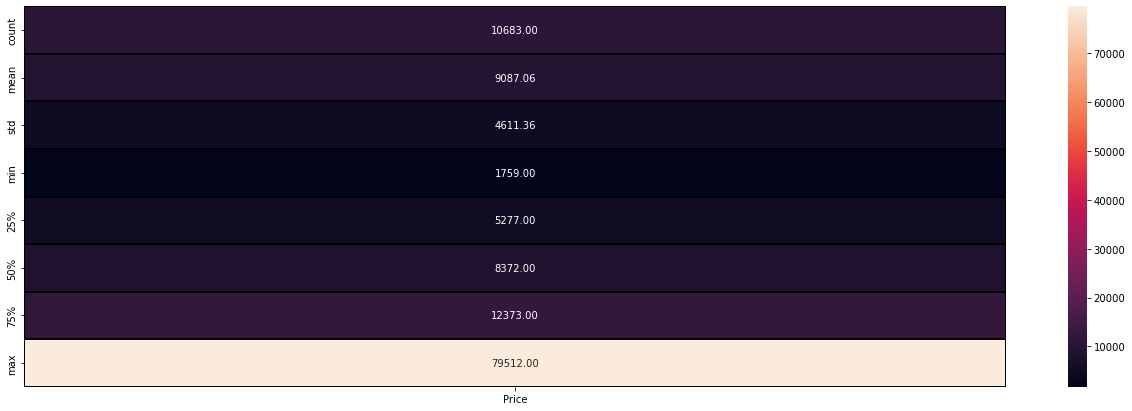

In [138]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt="0.2f")

Here heatmap containes the difference of describe values of dataset.

Light shades are higly describe

# Correlation of the columns with the target columns

In [139]:

df.corr()

,Price
Price,1.0


<AxesSubplot:>

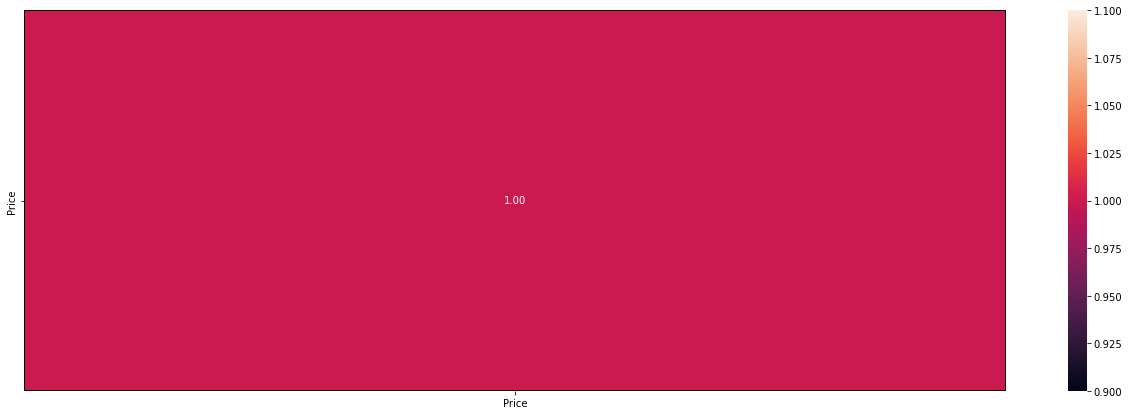

In [140]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt="0.2f")

Here heatmap containes only one corresponding values of dataset.

Light shades are higly corrolated

In [141]:
df.skew()

Price    1.812552
dtype: float64

Dataset contains skew value

# Outlier Check

In [142]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

<AxesSubplot:>

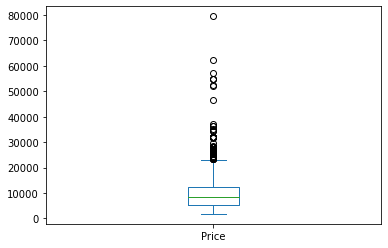

In [143]:
df['Price'].plot.box()

Here all boxplots have outside the viscous so we can find here outliers easily.

In [144]:
df.shape

(10683, 11)

Dataset contains 10683 rows and 11 columns

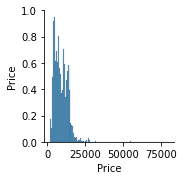

In [145]:
sns.pairplot(df)

Remove the missing values.

drop the nagativitycorrelated columns.

remove the outliers.

# considering the outlier removal

In [146]:
df.drop('Date_of_Journey',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [147]:
df.shape

(10683, 10)

Dataset contains 10683 rows and 10 columns

In [148]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')

Dataset contains 10 columns

# Encoding Method

In [149]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Airline']=LE.fit_transform(df['Airline'])

In [150]:
df.Airline.unique()

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9])

In [151]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,4,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,3,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [152]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Source']=LE.fit_transform(df['Source'])

In [153]:
df.Source.unique()

array([0, 3, 2, 1, 4])

In [154]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,0,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,3,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,4,2,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,3,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,3,0,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [155]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Destination']=LE.fit_transform(df['Destination'])

In [156]:
df.Destination.unique()

array([5, 0, 1, 4, 2, 3])

In [157]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,4,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,3,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,3,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [158]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Arrival_Time']=LE.fit_transform(df['Arrival_Time'])

In [159]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,0,5,BLR → DEL,22:20,233,2h 50m,non-stop,No info,3897
1,1,3,0,CCU → IXR → BBI → BLR,05:50,906,7h 25m,2 stops,No info,7662
2,4,2,1,DEL → LKO → BOM → COK,09:25,413,19h,2 stops,No info,13882
3,3,3,0,CCU → NAG → BLR,18:05,1324,5h 25m,1 stop,No info,6218
4,3,0,5,BLR → NAG → DEL,16:50,1237,4h 45m,1 stop,No info,13302


In [160]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Additional_Info']=LE.fit_transform(df['Additional_Info'])

In [161]:
df.Additional_Info.unique()

array([8, 5, 7, 1, 6, 0, 4, 3, 9, 2])

In [162]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,0,5,BLR → DEL,22:20,233,2h 50m,non-stop,8,3897
1,1,3,0,CCU → IXR → BBI → BLR,05:50,906,7h 25m,2 stops,8,7662
2,4,2,1,DEL → LKO → BOM → COK,09:25,413,19h,2 stops,8,13882
3,3,3,0,CCU → NAG → BLR,18:05,1324,5h 25m,1 stop,8,6218
4,3,0,5,BLR → NAG → DEL,16:50,1237,4h 45m,1 stop,8,13302


In [163]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Duration']=LE.fit_transform(df['Duration'])

In [164]:
df.Duration.unique()

array([240, 336, 106, 311, 303, 235,  65, 145, 185, 341,  38, 237, 233,
        25, 198, 300, 151, 156, 128, 308,  63, 241,  39,  61, 315, 317,
        40, 146, 312,   4, 309, 236, 322,  22,  23, 349, 155, 239,  24,
        83, 116, 282, 183, 280,  74,  71, 325, 191,  28, 206,   2,   5,
       121, 120, 197, 335,  41, 307, 117,  57, 238, 147, 362,   0, 137,
       103,  27,  95, 358,  88,  78,  26, 337, 168, 354, 333,  53, 245,
        60,  32,   1,  64,  59, 125, 157,  96,  72, 234, 344,  82, 281,
        48, 165, 141, 136,   9, 346, 350,  21, 209, 348, 132, 304, 345,
       172, 162, 188, 193, 222, 182, 359, 357, 288,  17, 361,  89, 318,
       189, 123,  36,  99, 169, 305, 186, 323, 102, 110, 226, 367,   8,
        19, 154, 274, 187,  46, 351, 161,  30, 170, 119,  12,  14,  54,
        34, 356, 339,  20, 178,  94, 231, 148,  55, 334, 124, 130, 204,
       173, 127, 313,  56, 314, 306,  70, 340, 218, 298, 285, 353, 164,
       176, 140, 355, 324,  69, 196, 177, 192, 167, 342, 195, 15

In [165]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,0,5,BLR → DEL,22:20,233,240,non-stop,8,3897
1,1,3,0,CCU → IXR → BBI → BLR,05:50,906,336,2 stops,8,7662
2,4,2,1,DEL → LKO → BOM → COK,09:25,413,106,2 stops,8,13882
3,3,3,0,CCU → NAG → BLR,18:05,1324,311,1 stop,8,6218
4,3,0,5,BLR → NAG → DEL,16:50,1237,303,1 stop,8,13302


In [166]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Dep_Time']=LE.fit_transform(df['Dep_Time'])

In [167]:
df.Dep_Time.unique()

array([211,  31,  70, 164, 149,  66, 172,  55,  65,  91,  74, 188,  94,
       198, 154, 147,  63, 118, 187, 141, 120, 207,  16, 201, 205,  45,
        46,  75, 125,  83, 130, 121,  42, 195,  88,  30, 173, 218,  86,
        72, 199, 221, 181,  64, 137,  34, 129, 117,  32, 111,  23,  38,
       157,  58, 183,  39, 119,   7,  73,  59, 189, 110,   9, 150, 193,
        25, 182, 184,  35, 178,  19, 106, 165, 155, 134, 217,  98, 127,
        96,  92, 126, 175,  33, 220,  52, 108, 103, 131, 105, 167, 145,
         3,  43, 107, 176,   4, 151,  77, 179, 135, 100, 142, 191, 212,
       197,  28,  24,  41, 132,   2,  60,  47,  27, 123,  26,  80, 160,
       109, 209,  21, 161, 200,  37, 140, 190, 156,  71,  51,  11,  85,
       153,  67, 171, 133, 215, 128, 122, 112, 210,  87, 143, 186,  44,
       174,  54,  53,  79,  57,  93, 196, 162, 148, 166,  15,  61, 177,
       185, 159,  18, 158,  76,  22, 163,  12, 192, 216, 213, 202,  56,
       152,  50, 138,  68, 139,  95, 208, 169,   1, 180, 194, 21

In [168]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,0,5,BLR → DEL,211,233,240,non-stop,8,3897
1,1,3,0,CCU → IXR → BBI → BLR,31,906,336,2 stops,8,7662
2,4,2,1,DEL → LKO → BOM → COK,70,413,106,2 stops,8,13882
3,3,3,0,CCU → NAG → BLR,164,1324,311,1 stop,8,6218
4,3,0,5,BLR → NAG → DEL,149,1237,303,1 stop,8,13302


In [169]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')

In [170]:
df.drop(['Route','Total_Stops'],axis=1,inplace=True)

In [171]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Additional_Info,Price
0,3,0,5,211,233,240,8,3897
1,1,3,0,31,906,336,8,7662
2,4,2,1,70,413,106,8,13882
3,3,3,0,164,1324,311,8,6218
4,3,0,5,149,1237,303,8,13302


# Missing Value Handling Method

In [172]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Additional_Info    0
Price              0
dtype: int64

Dataset contains the sum of nullvalues will be zeros

In [173]:
df["Airline"]=df["Airline"].fillna(df["Airline"].mean())
df["Source"]=df["Source"].fillna(df["Source"].median())

# Checking Skewness

In [174]:
df.skew()

Airline            0.731095
Source            -0.424054
Destination        1.244169
Dep_Time           0.195055
Arrival_Time      -0.606530
Duration          -0.213427
Additional_Info   -1.779838
Price              1.812552
dtype: float64

Dataset contains the skewness values

# Removing The Outliers

In [175]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Additional_Info,Price
0,0.410675,1.658441,2.416665,1.686554,1.921086,0.422875,0.499892,1.125548
1,1.260999,0.890052,0.973826,1.260270,0.109117,1.306727,0.499892,0.309048
2,0.014486,0.040555,0.295728,0.621792,1.378090,0.810835,0.499892,1.039858
3,0.410675,0.890052,0.973826,0.917105,1.370075,1.076557,0.499892,0.622202
4,0.410675,1.658441,2.416665,0.671537,1.107627,1.002903,0.499892,0.914076
...,...,...,...,...,...,...,...,...
10678,1.686161,0.890052,0.973826,1.228159,1.173993,0.386047,0.499892,1.080006
10679,1.260999,0.890052,0.973826,1.391872,1.312759,0.395254,0.499892,1.071765
10680,0.014486,1.658441,0.382370,0.818247,0.138248,0.791146,0.499892,0.402951
10681,2.565458,1.658441,2.416665,0.261624,0.205650,0.404461,0.499892,0.772246


Here removing the outliers of df

In [176]:
threshold=3
print(np.where(z>3))

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
         826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
        1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
        2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
        2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
        3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
        4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
        5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
        6336,  6407,  6576,  6576,  6588,  6605,  6991,  7351,  7356,
        7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,  7902,
        8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,
        8957,  8990,  9019,  9019,  9193,  9239,  9632,  9657,  9715,
        9974, 10052, 10113, 10160, 10182, 10189, 10353, 10364, 10364,
       10383, 10439, 10511, 10511], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7,

In [177]:
df_new=df[(z<3).all(axis=1)]
df_new

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Additional_Info,Price
0,3,0,5,211,233,240,8,3897
1,1,3,0,31,906,336,8,7662
2,4,2,1,70,413,106,8,13882
3,3,3,0,164,1324,311,8,6218
4,3,0,5,149,1237,303,8,13302
...,...,...,...,...,...,...,...,...
10678,0,3,0,183,1259,236,8,4107
10679,1,3,0,193,1305,237,8,4145
10680,4,0,2,58,824,280,8,7229
10681,10,0,5,92,938,238,8,12648


Here new dataset contains 10578 rows and 8 columns

In [178]:
df.shape

(10683, 8)

Dataset Contains 10683 rows and 8 columns

In [179]:
df_new.shape

(10578, 8)

New Dataset contains 10578 rows and 8 columns

# StandardScalar Method

In [180]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [181]:
scaledX

array([[-0.41067545, -1.65844074,  2.41666505, ...,  0.42287466,
         0.49989167, -1.12554821],
       [-1.26099927,  0.89005213, -0.97382594, ...,  1.30672664,
         0.49989167, -0.30904789],
       [ 0.01448647,  0.04055451, -0.29572775, ..., -0.81083539,
         0.49989167,  1.03985835],
       ...,
       [ 0.01448647, -1.65844074,  0.38237045, ...,  0.79114632,
         0.49989167, -0.40295085],
       [ 2.56545795, -1.65844074,  2.41666505, ...,  0.40446108,
         0.49989167,  0.77224576],
       [-1.26099927,  0.04055451, -0.29572775, ...,  1.40800134,
         0.49989167,  0.57815073]])

Here standardscaler value of scaledX

In [182]:
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [183]:
Y.explained_variance_ratio_

array([0.2076876 , 0.14460308, 0.13320377, 0.12959327, 0.12464396,
       0.10903691, 0.10426519, 0.04696621])

In [184]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 20.76875986,  35.22906744,  48.54944475,  61.50877202,
        73.97316832,  84.8768598 ,  95.30337909, 100.        ])

In [185]:
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 7


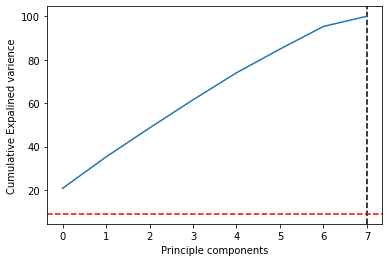

In [186]:
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

Here ylabel contains cumulative explained varience and xlabel contains principle components.

# Model Building

In [187]:
x_train = df.drop(['Source'],axis=1)
y_train = df.Source

In [188]:
x_train.head()

,Airline,Destination,Dep_Time,Arrival_Time,Duration,Additional_Info,Price
0,3,5,211,233,240,8,3897
1,1,0,31,906,336,8,7662
2,4,1,70,413,106,8,13882
3,3,0,164,1324,311,8,6218
4,3,5,149,1237,303,8,13302


In [189]:
y_train.head()

0    0
1    3
2    2
3    3
4    0
Name: Source, dtype: int32

In [190]:
x_train.shape

(10683, 7)

x_train contains 10683 rows and 7 columns

In [191]:
y_train.shape

(10683,)

y_train contains 10683 rows and zeros

# Regressor Methods

In [192]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [193]:
x= df.drop(['Source'],axis=1)
y = df["Source"]
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=0, test_size=0.2)

In [194]:
from sklearn.metrics import mean_squared_error
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(rmse)

0.11788454892243297
0.06943577811935481
0.11788454892243297
0.06943577811935481
0.09674216804911331
0.11667544466342449
0.0
0.09526510164590819
0.09526510164590819
0.09819701913032057
0.0673625993842474
0.13681408610843315
0.0
0.0
0.0673625993842474
0.11788454892243297
0.09674216804911331
0.07144882623443113
0.07144882623443113
0.0
0.11667544466342449
0.07144882623443113
0.09674216804911331
0.0673625993842474
0.09819701913032057
0.01684064984606185
0.0673625993842474
0.11667544466342449
0.0
0.06943577811935481
0.01684064984606185
0.07144882623443113
0.09819701913032057
0.11788454892243297
0.0673625993842474
0.09526510164590819
0.09526510164590819
0.0673625993842474
0.11908137705738524
0.09674216804911331
0.07144882623443113
0.023816275411477048
0.023816275411477048
0.12375299717919484
0.09526510164590819
0.0673625993842474
0.09674216804911331
0.07531367568213133
0.01684064984606185
0.06943577811935481
0.01684064984606185
0.023816275411477048
0.01684064984606185
0.07144882623443113
0.13

In [195]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [196]:
y_pred = regressor.predict(x_test)

In [197]:
y_pred

array([3., 2., 3., ..., 2., 3., 4.])

In [198]:
dt_accuracy = round(regressor.score(x_train,y_train)*100,2)
dt_accuracy

100.0

The Test Accuracy of DecisionTreeRegressor is 100

In [199]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [200]:
y_pred = regressor.predict(x_test)
y_pred

array([3., 2., 3., ..., 2., 3., 4.])

In [201]:
rf_accuracy = round(regressor.score(x_train,y_train)*100,2)
rf_accuracy

99.95

The Test Accuracy of RandomForestRegressor 99.95

In [202]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [203]:
y_pred = regressor.predict(x_test)
y_pred

array([2.58589889, 1.78149605, 2.78661624, ..., 2.61326875, 2.30429324,
       1.32403676])

In [204]:
lr_accuracy = round(regressor.score(x_train,y_train)*100,2)
lr_accuracy

38.17

The Test Accuracy of LinearRegression is 38.17

In [205]:
from sklearn.naive_bayes import GaussianNB
regressor = GaussianNB()
regressor.fit(x_train,y_train)

GaussianNB()

In [206]:
y_pred = regressor.predict(x_test)
y_pred 

array([3, 2, 3, ..., 2, 3, 4])

In [207]:
nb_accuracy = round(regressor.score(x_train,y_train)*100,2)
nb_accuracy

99.46

The Test Accuracy of GaussianNB is 99.46

In [208]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train,y_train)

SVR()

In [209]:
y_pred = regressor.predict(x_test)
y_pred

array([2.21643584, 2.09116445, 1.99192579, ..., 2.11599819, 2.10227686,
       2.13312899])

In [210]:
svm_accuracy = round(regressor.score(x_train,y_train)*100,2)
svm_accuracy

1.26

The Test Accuracy of SVR is 1.26

In [211]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train,y_train)

KNeighborsRegressor()

In [212]:
y_pred = regressor.predict(x_test)
y_pred

array([3. , 2.2, 2. , ..., 2. , 3. , 2. ])

In [213]:
knn_accuracy = round(regressor.score(x_train,y_train)*100,2)
knn_accuracy

75.24

The Test Accuracy of KNN regressor is 75.24

# Cross validation methods

In [214]:
from sklearn.model_selection import cross_val_score

In [215]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.9965646439937892


In [216]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.9969719290631041


In [217]:
from sklearn.svm import SVR
regressor = SVR()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.01524583972267506


In [218]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.38530456930958845


In [219]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.6410485696020395


In [220]:
from sklearn.naive_bayes import GaussianNB
regressor = GaussianNB()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.9944773204061137


# Hyperparameter Tunnings

In [221]:
from sklearn.model_selection import GridSearchCV

In [222]:
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}

In [223]:
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [224]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [225]:
GCV.best_params_

{'criterion': 'friedman_mse', 'max_depth': 9}

# Evalute The Final Model

In [226]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

100.0


# Saving The Model

In [227]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

Here save the final model[FinalModle.pkl]

# Prediction Method

In [228]:
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
preds = regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[3. 2. 3. 3. 2. 2. 0. 2. 3. 2. 0. 2. 3. 2. 3. 0. 0. 2. 2. 0. 2. 3. 0. 0.
 0. 2. 0. 2. 2. 3. 3. 3. 1. 2. 3. 3.]
[3 2 3 3 2 2 0 2 3 2 0 2 3 2 3 0 0 2 2 0 2 3 0 0 0 2 0 2 2 3 3 3 1 2 3 3]


The train and test data is balanced most regressor methods hit the 99% accuracy with the datset.